    Для выполнения данной лабораторной работы будем использовать данные об отзывах клиентов магазина, которые совершили покупки.
    Для начала импортируем DataSet и посмотрим на "шапку". Параметр sep зададим, чтобы использовать разделитель, отличный от стандартного - в нашем случае это запятая.

In [1]:
import pandas as pd
import numpy as np

    Отметим, что при таком импорте DataSet необходимо разместить файл с DataSet в том же месте (в той же директории и папке), что и проект Jupyter notebook.

In [2]:
df = pd.read_csv('marvel-wikia-data.csv', sep=',')

In [3]:
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


    Для начала удалим дубликаты, так как дублирующие записи искажают показатели DataSet. Но перед удалением дубликатов обязательно узнаем, сколько записей находится в DataSet.

In [4]:
df.shape

(16376, 13)

Посмотрим краткую информацию обо всех параметрах датасета

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


В выбранном датасете находятся преимущественно данные строкового типа. Проверим датасет на наличие дубликатов

In [6]:
df = df.drop_duplicates()
df.shape

(16376, 13)

    Видно, что Pandas не нашел ни одного дубликата

    Обработка пропусков!
    Помним,что если у признака более 70% пропусков, то такой признак удаляют. Поэтому проверим, насколько наши признаки полны.


In [7]:
column_values = df[['page_id', 'name', 'EYE', 'HAIR', 'GSM']].values.ravel()
unique_values =  pd.unique(column_values)
print(unique_values)

[1678 'Spider-Man (Peter Parker)' 'Hazel Eyes' ...
 'TK421 (Spiderling) (Earth-616)' 673702 'Yologarch (Earth-616)']


    Существует несколько способов обозначить пропуски, и зачастую создатели датасета не описывают данные в достаточной мере, и определять, как обозначены пропуски, приходится вручную. 
    Например:

    1) NaN / NaT (упрощенно: "не число" / "не время")
    2) Пустая ячейка
    3) Для числовых признаков – радикальный выброс. К примеру, для столбца "День" это число 999.
    4) Маркер или нестандартный символ
    
    Встроенные методы Pandas позволяют с легкостью справиться с первыми двумя разновидностями таких пробелов. Разберемся для начала с категориальными переменными, объединив их в один список.

In [8]:
df = df.replace({"День": 999,
                 "page_id": "Неизвестно",
                 "name": "Неизвестно",
                 "EYE": "Неизвестно",
                 "HAIR": "Неизвестно",
                 "GSM": "Неизвестно",
                 }, np.nan)

df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


    Среди всех признаков 99% пропусков находится у признака "GSM" и почти 60% - у "EYE", первый признак поделжит удалению.

In [10]:
df.isnull().mean() * 100

page_id              0.000000
name                 0.000000
urlslug              0.000000
ID                  23.021495
ALIGN               17.171470
EYE                 59.642159
HAIR                26.038105
SEX                  5.214949
GSM                 99.450415
ALIVE                0.018319
APPEARANCES          6.692721
FIRST APPEARANCE     4.976795
Year                 4.976795
dtype: float64

In [11]:
df = df.drop(columns=['GSM'])
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,Nov-50,1950.0


    Процесс обработки пропусков, к счастью, можно сократить с помощью sklearn.impute.SimpleImputer. Мы выбираем все категориальные переменные и применяем стратегию "[вставить вместо пропуска] самое распространенное значение":

In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

df["page_id"] = imputer.fit_transform(df["page_id"].values.reshape(-1,1))[:,0]

df["name"] = imputer.fit_transform(df["name"].values.reshape(-1,1))[:,0]

df["EYE"] = imputer.fit_transform(df["EYE"].values.reshape(-1,1))[:,0]

df["HAIR"] = imputer.fit_transform(df["HAIR"].values.reshape(-1,1))[:,0]

    Подобным образом заполняются пустоты в числовых переменных, только стратегия теперь – "вставить среднее значение".

In [13]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

df["APPEARANCES"] = imputer.fit_transform(df["APPEARANCES"].values.reshape(-1,1))[:,0]

df["Year"] = imputer.fit_transform(df["Year"].values.reshape(-1,1))[:,0]

In [14]:
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,Nov-50,1950.0


Масштабирование данных

<AxesSubplot:xlabel='Year', ylabel='Count'>

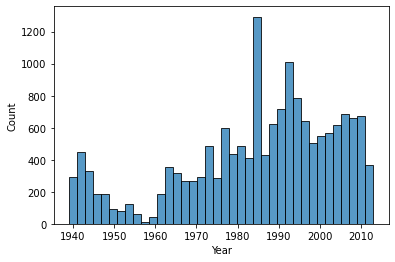

In [16]:
import seaborn as sns

sns.histplot(df['Year'])

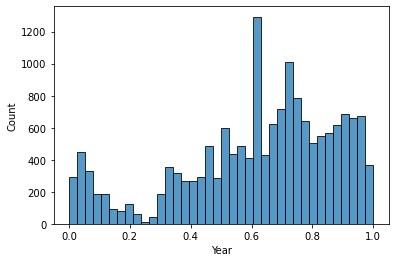

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

df['Year'] = MinMaxScaler().fit_transform(df['Year'].values.reshape(-1, 1))
sns.histplot(df['Year']);

Кодирование категориальных признаков

In [20]:
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,1.000000,Aug-62,0.310811
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,0.831024,Mar-41,0.027027
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,0.757051,Oct-74,0.472973
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,0.732311,Mar-63,0.324324
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,0.558387,Nov-50,0.148649


In [21]:
def find_cat(df):
    for name in df.columns:
        s = ''
        s += name
        if(type(df[name][0]) == str):
            s += ' строка,'
            if(df[name].nunique() <= 3):
                s += ' мало уникальных'
                if(s != name):
                    print (s)

find_cat(df)
df.head

ALIGN строка, мало уникальных
ALIVE строка, мало уникальных


<bound method NDFrame.head of        page_id                                 name  \
0         1678            Spider-Man (Peter Parker)   
1         7139      Captain America (Steven Rogers)   
2        64786  Wolverine (James \"Logan\" Howlett)   
3         1868    Iron Man (Anthony \"Tony\" Stark)   
4         2460                  Thor (Thor Odinson)   
...        ...                                  ...   
16371   657508                   Ru'ach (Earth-616)   
16372   665474      Thane (Thanos' son) (Earth-616)   
16373   695217        Tinkerer (Skrull) (Earth-616)   
16374   708811       TK421 (Spiderling) (Earth-616)   
16375   673702                Yologarch (Earth-616)   

                                       urlslug                ID  \
0                  \/Spider-Man_(Peter_Parker)   Secret Identity   
1            \/Captain_America_(Steven_Rogers)   Public Identity   
2      \/Wolverine_(James_%22Logan%22_Howlett)   Public Identity   
3        \/Iron_Man_(Anthony_%22Tony%

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.page_id)
df['page_id_le'] = le.transform(df.page_id)
df

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,page_id_le
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,1.000000,Aug-62,0.310811,484
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,0.831024,Mar-41,0.027027,1516
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,0.757051,Oct-74,0.472973,5385
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,0.732311,Mar-63,0.324324,616
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,0.558387,Nov-50,0.148649,1028
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,Living Characters,0.003967,NaN,0.620970,14496
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,Living Characters,0.003967,NaN,0.620970,14617
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,Living Characters,0.003967,NaN,0.620970,15179
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,0.003967,NaN,0.620970,15483
